In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.10.1


In [3]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train,x_test = x_train/255.0, x_test/255.0

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


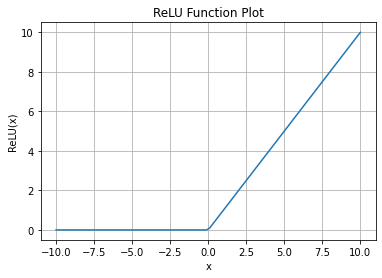

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range for X, for instance from -10 to 10
x = np.linspace(-10,10,100)

# Apply the ReLU function to every element of x
y = np.maximum(0,x)

# Create a plot
plt.figure()
plt.plot(x,y)
plt.title("ReLU Function Plot")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.grid()
plt.show()

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2984 - accuracy: 0.9121
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1480 - accuracy: 0.9560
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1104 - accuracy: 0.9665
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0892 - accuracy: 0.9729
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0755 - accuracy: 0.9762
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0670 - accuracy: 0.9786
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0589 - accuracy: 0.9809
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0525 - accuracy: 0.9828
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0501 - accuracy: 0.9832
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.045

In [10]:
#ocena modelu
test_loss,test_acc = model.evaluate(x_test,y_test,verbose=2)
print(f'strata: {test_loss}, dokładnośc: {test_acc}')

313/313 - 1s - loss: 0.0717 - accuracy: 0.9796 - 562ms/epoch - 2ms/step
strata: 0.0716540738940239, dokładnośc: 0.9796000123023987


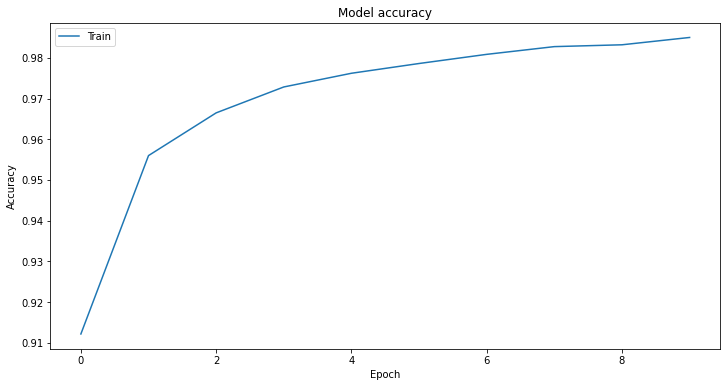

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()